In [1]:
import requests
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import time
import os
import re

from sentence_transformers import SentenceTransformer

I:\Anaconda\Lib\site-packages\transformers\utils\hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


# Scrapping danych i zapis

## Utworzenie dataframe i słownika dat
utworzenie pustego dataframe politicians_df z potrzebnymi kolumnami i stworzenie słownika ze wszystkimi datami i posiedzeniami sejmu

In [2]:
politicians_df = pd.DataFrame(columns=["politician", "political_club", "utterance", "sejm_session", "date"])

# KADENCJA X
gov_meetings_dict = {
    "2023-11-13": [1],
    "2023-11-14": [1],
    "2023-11-21": [1],
    "2023-11-22": [1],
    "2023-11-28": [1],
    "2023-11-29": [1],
    "2023-12-06": [1],
    "2023-12-07": [1],
    "2023-12-11": [1],
    "2023-12-12": [1],
    "2023-12-19": [1],
    "2023-12-20": [1],
    "2023-12-21": [1],
    "2024-01-16": [2],
    "2024-01-17": [2],
    "2024-01-18": [3],
    "2024-01-25": [4],
    "2024-01-26": [4],
    "2024-02-07": [5],
    "2024-02-08": [5],
    "2024-02-09": [5],
    "2024-02-21": [6],
    "2024-02-22": [6],
    "2024-03-06": [7],
    "2024-03-07": [7],
    "2024-03-08": [7],
    "2024-03-20": [8],
    "2024-03-21": [8],
    "2024-04-10": [9],
    "2024-04-11": [9],
    "2024-04-12": [9],
    "2024-04-24": [10],
    "2024-04-25": [10],
    "2024-04-26": [10],
    "2024-05-08": [11],
    "2024-05-09": [11],
    "2024-05-15": [11],
    "2024-05-22": [12],
    "2024-05-23": [12],
    "2024-06-12": [13],
    "2024-06-13": [13],
    "2024-06-14": [13],
    "2024-06-26": [14],
    "2024-06-27": [14],
    "2024-06-28": [14],
    "2024-07-11": [15],
    "2024-07-12": [15],
    "2024-07-23": [16],
    "2024-07-24": [16],
    "2024-07-25": [16],
    "2024-07-26": [16],
    "2024-09-11": [17],
    "2024-09-12": [17],
    "2024-09-13": [17],
    "2024-09-25": [18],
    "2024-09-26": [18],
    "2024-09-27": [18],
    "2024-10-01": [18],
    "2024-10-09": [19],
    "2024-10-10": [19],
    "2024-10-11": [19],
    "2024-10-16": [20],
    "2024-10-17": [20],
    "2024-10-18": [20],
    "2024-11-06": [21],
    "2024-11-07": [21],
    "2024-11-08": [21],
    "2024-11-19": [22],
    "2024-11-20": [22],
    "2024-11-21": [22],
    "2024-11-22": [22],
    "2024-11-27": [22],
    "2024-12-04": [23],
    "2024-12-05": [23],
    "2024-12-06": [24],
    "2024-12-18": [25],
    "2024-12-19": [25],
    "2024-12-20": [25],
    "2025-01-08": [26],
    "2025-01-09": [26],
    "2025-01-10": [26],
    "2025-01-22": [27],
    "2025-01-23": [27],
    "2025-01-24": [27],
    "2025-02-05": [28],
    "2025-02-06": [28],
    "2025-02-20": [29],
    "2025-02-21": [29],
    "2025-03-05": [30],
    "2025-03-06": [30],
    "2025-03-07": [30],
    "2025-03-19": [31],
    "2025-03-20": [31],
    "2025-04-02": [32],
    "2025-04-03": [32],
    "2025-04-04": [32],
    "2025-04-23": [33],
    "2025-04-24": [33],
    "2025-05-07": [34],
    "2025-05-08": [34],
    "2025-05-09": [34],
    "2025-05-20": [35],
    "2025-05-21": [35]
}

In [2]:
#politicians_df = pd.DataFrame(columns=["utterance"])
politicians_df = pd.DataFrame(columns=["politician", "political_club", "utterance", "sejm_session", "date"])

# KADENCJA IX
gov_meetings_dict = {
    "2019-11-12": [1],
    "2019-11-13": [1],
    "2019-11-19": [1],
    "2019-11-21": [1],
    
    "2019-12-12": [2],
    "2019-12-19": [2],
    "2019-12-20": [2],
    
    "2020-01-08": [3],
    "2020-01-09": [3],
    "2020-01-10": [3],
    
    "2020-01-22": [4],
    "2020-01-23": [4],
    
    "2020-02-12": [5],
    "2020-02-13": [5],

    "2020-02-14": [6],

    "2020-03-02": [7],

    "2020-03-26": [8],
    "2020-03-27": [8],

    "2020-03-31": [9],
    "2020-04-03": [9],
    "2020-04-06": [9],
    "2020-04-07": [9],
    "2020-04-08": [9],

    "2020-04-15": [10],
    "2020-04-16": [10],

    "2020-04-29": [11],
    "2020-04-30": [11],
    "2020-05-05": [11],
    "2020-05-06": [11],
    "2020-05-07": [11],
    "2020-05-12": [11],
    "2020-05-14": [11],

    "2020-05-27": [12],
    "2020-05-28": [12],
    "2020-06-02": [12],
    "2020-06-04": [12],

    "2020-06-19": [13],

    "2020-07-15": [14],
    "2020-07-16": [14],

    "2020-07-22": [15],
    "2020-07-23": [15],
    "2020-07-24": [15],

    "2020-08-14": [16],

    "2020-09-16": [17],
    "2020-09-17": [17],

    "2020-10-07": [18],

    "2020-10-20": [19],
    "2020-10-21": [19],
    "2020-10-22": [19],

    "2020-10-27": [20],
    "2020-10-28": [20],

    "2020-11-18": [21],
    "2020-11-19": [21],
    "2020-11-27": [21],
    "2020-11-28": [21],

    "2020-12-09": [22],
    "2020-12-10": [22],

    "2020-12-15": [23],
    "2020-12-16": [23],

    "2020-12-17": [24],

    "2021-01-20": [25],
    "2021-01-21": [25],

    "2021-02-24": [26],
    "2021-02-25": [26],

    "2021-03-16": [27],
    "2021-03-17": [27],
    "2021-03-30": [27],

    "2021-04-14": [28],
    "2021-04-15": [28],
    "2021-04-20": [28],

    "2021-05-04": [29],

    "2021-05-19": [30],
    "2021-05-20": [30],
    "2021-05-21": [30],
    "2021-05-28": [30],

    "2021-06-15": [31],

    "2021-06-16": [32],

    "2021-06-23": [33],
    "2021-06-24": [33],

    "2021-07-07": [34],
    "2021-07-08": [34],

    "2021-07-21": [35],
    "2021-07-22": [35],
    "2021-07-23": [35],
    
    "2021-08-11": [36],
    "2021-09-06": [36],
    "2021-09-15": [36],

    "2021-09-15": [37],
    "2021-09-16": [37],
    "2021-09-17": [37],

    "2021-09-29": [38],
    "2021-09-30": [38],
    "2021-10-01": [38],

    "2021-10-13": [39],
    "2021-10-14": [39],

    "2021-10-28": [40],
    "2021-10-29": [40],

    "2021-11-09": [41],

    "2021-11-16": [42],
    "2021-11-17": [42],

    "2021-11-30": [43],
    "2021-12-01": [43],
    "2021-12-02": [43],
    "2021-12-08": [43],
    "2021-12-09": [43],

    "2021-12-14": [44],
    "2021-12-15": [44],

    "2021-12-17": [45],

    "2022-01-12": [46],
    "2022-01-13": [46],

    "2022-01-26": [47],
    "2022-01-27": [47],
    "2022-02-01": [47],

    "2022-02-08": [48],
    "2022-02-09": [48],

    "2022-02-23": [49],
    "2022-02-24": [49],
    "2022-03-03": [49],

    "2022-03-08": [50],
    "2022-03-09": [50],
    "2022-03-11": [50],
    "2022-03-12": [50],

    "2022-03-23": [51],
    "2022-03-24": [51],

    "2022-04-06": [52],
    "2022-04-07": [52],
    "2022-04-13": [52],

    "2022-04-27": [53],
    "2022-04-28": [53],

    "2022-05-11": [54],
    "2022-05-12": [54],

    "2022-05-25": [55],
    "2022-05-26": [55],

    "2022-06-08": [56],
    "2022-06-09": [56],

    "2022-06-22": [57],
    "2022-06-23": [57],

    "2022-07-06": [58],
    "2022-07-07": [58],

    "2022-07-20": [59],
    "2022-07-21": [59],
    "2022-07-22": [59],
    "2022-08-05": [59],

    "2022-09-02": [60],

    "2022-09-14": [61],
    "2022-09-15": [61],
    "2022-09-16": [61],

    "2022-09-28": [62],
    "2022-09-29": [62],

    "2022-10-05": [63],
    "2022-10-06": [63],
    "2022-10-07": [63],
    "2022-10-20": [63],
    
    "2022-10-26": [64],
    "2022-10-27": [64],

    "2022-11-03": [65],
    "2022-11-04": [65],

    "2022-11-15": [66],
    "2022-11-16": [66],

    "2022-11-30": [67],
    "2022-12-01": [67],

    "2022-12-13": [68],
    "2022-12-14": [68],
    "2022-12-15": [68],

    "2022-12-15": [69],

    "2023-01-11": [70],
    "2023-01-12": [70],
    "2023-01-13": [70],

    "2023-01-25": [71],
    "2023-01-26": [71],

    "2023-02-07": [72],
    "2023-02-08": [72],
    "2023-02-09": [72],

    "2023-03-07": [73],
    "2023-03-08": [73],
    "2023-03-09": [73],

    "2023-04-12": [74],
    "2023-04-13": [74],
    "2023-04-14": [74],

    "2023-05-09": [75],

    "2023-05-24": [76],
    "2023-05-25": [76],
    "2023-05-26": [76],

    "2023-06-13": [77],
    "2023-06-14": [77],
    "2023-06-15": [77],
    "2023-06-16": [77],

    "2023-07-06": [78],
    "2023-07-07": [78],

    "2023-07-11": [79],
    "2023-07-12": [79],
    "2023-07-13": [79],
    
    "2023-07-28": [80],

    "2023-08-16": [81],
    "2023-08-17": [81],
    "2023-08-30": [81]
}


## Scrapping danych przy użyciu sejmowego API
- przeiterowanie po każdej dacie i numerze posiedzenia sejmu,
- stworzenie URL do API sejmu zawierającego konkretną datę oraz posiedzenie i pobranie każdej wypowiedzi z danego zebrania
- wyjęcie z 'h2' polityka (politician)
- wyjęcie zmiędzy paragrafów 'p' wypowiedzi (utterance)
- zapisanie wszystkiego do politicians_df

In [4]:
for name, key in gov_meetings_dict.items():
    for number in key:
        i = 1
        start_time = time.time()
        while True:
            url = f"https://api.sejm.gov.pl/sejm/term9/proceedings/{number}/{name}/transcripts/{i}"
            page = requests.get(url)
            soup = BeautifulSoup(page.text, 'html')
        
            element = soup.find('h2', class_='mowca')
            if element is not None:
                politician = element.text.strip()[:-1]
            else:
                print(f'Koniec wypowiedzi. Odnotowano: {i} przemówień')
                break
        
            utterance_elements = []
            for p in soup.find_all('p')[1:]:
                utterance_elements.append(p.text.strip())
            utterance = "".join(utterance_elements).strip()
        
            nowy_wiersz = pd.DataFrame({"politician": [politician], 
                                        "utterance": [utterance], 
                                        "sejm_session": [number], 
                                        "date": [name]})
            politicians_df = pd.concat([politicians_df, nowy_wiersz], ignore_index=True)
        
            i = i+1
        end_time = time.time()
        print(f'Czas posiedzenia nr {number} o dacie {name}: {end_time-start_time:.2f} sekundy \n')

Koniec wypowiedzi. Odnotowano: 47 przemówień
Czas posiedzenia nr 1 o dacie 2019-11-12: 11.49 sekundy 

Koniec wypowiedzi. Odnotowano: 10 przemówień
Czas posiedzenia nr 1 o dacie 2019-11-13: 3.15 sekundy 

Koniec wypowiedzi. Odnotowano: 292 przemówień
Czas posiedzenia nr 1 o dacie 2019-11-19: 74.90 sekundy 

Koniec wypowiedzi. Odnotowano: 137 przemówień
Czas posiedzenia nr 1 o dacie 2019-11-21: 35.54 sekundy 

Koniec wypowiedzi. Odnotowano: 191 przemówień
Czas posiedzenia nr 2 o dacie 2019-12-12: 51.59 sekundy 

Koniec wypowiedzi. Odnotowano: 218 przemówień
Czas posiedzenia nr 2 o dacie 2019-12-19: 61.98 sekundy 

Koniec wypowiedzi. Odnotowano: 149 przemówień
Czas posiedzenia nr 2 o dacie 2019-12-20: 54.06 sekundy 

Koniec wypowiedzi. Odnotowano: 268 przemówień
Czas posiedzenia nr 3 o dacie 2020-01-08: 85.30 sekundy 

Koniec wypowiedzi. Odnotowano: 227 przemówień
Czas posiedzenia nr 3 o dacie 2020-01-09: 58.70 sekundy 

Koniec wypowiedzi. Odnotowano: 83 przemówień
Czas posiedzenia nr 3 

## Sprawdzenie poprawności dataframe
różne informacje: pierwsza wartość, próbka, shape itp.

In [4]:
politicians_df.iloc[0,0]

'Prezydent Rzeczypospolitej Polskiej Andrzej Duda'

In [61]:
politicians_df.sample()

,politician,political_club,utterance,sejm_session,date
7870,Poseł Małgorzata Pępek,Nieznana partia,Panie Marszałku! Wysoka Izbo! Dzięki temu proj...,16,2024-07-23


In [5]:
politicians_df.shape

(38893, 5)

In [65]:
politicians_df.groupby('political_club').size().sort_values(ascending=False)

political_club
PiS                6976
KO                 5776
Polska2050-TD      1555
Konfederacja       1456
PSL-TD             1116
Lewica             1071
Nieznana partia     854
Republikanie        568
Razem               355
niez.               310
dtype: int64

## Dodanie danych o partiach politycznych
wykorzystanie sejmowego API do stworzenia słownika zawierającego partie polityczne i ich posłów, a następnie przeiterowanie po datasecie politicians_df aby nadać politykom ich kluby

In [8]:
url_politicians = "https://api.sejm.gov.pl/sejm/term10/MP"
page_politicians = requests.get(url_politicians)
political_parties_data = page_politicians.json()

In [62]:
club_dict = {}

for person in political_parties_data:
    club = person.get("club", "Brak klubu")
    name = person.get("firstLastName", "Nieznany")

    # Dodajemy do słownika
    if club in club_dict:
        club_dict[club].append(name)
    else:
        club_dict[club] = [name]

for club, names in club_dict.items():
    print(f"{club}: {', '.join(names)}\n")

PiS: Andrzej Adamczyk, Adam Andruszkiewicz, Waldemar Andzel, Dorota Arciszewska-Mielewczyk, Iwona Ewa Arent, Marek Ast, Piotr Babinetz, Ryszard Bartosik, Barbara Bartuś, Mariusz Błaszczak, Rafał Bochenek, Jacek Bogucki, Zbigniew Bogucki, Joanna Borowiak, Kamil Bortniczuk, Bożena Borys-Szopa, Waldemar Buda, Lidia Burzyńska, Zbigniew Chmielowiec, Artur Chojecki, Kazimierz Bogusław Choma, Dominika Chorosińska, Tadeusz Chrzan, Anna Ewa Cicholska, Krzysztof Ciecióra, Janusz Cieszyński, Michał Cieślak, Krzysztof Czarnecki, Witold Wojciech Czarnecki, Przemysław Czarnek, Arkadiusz Czartoryski, Anita Czerwińska, Katarzyna Czochara, Władysław Dajczak, Anna Dąbrowska-Banaszek, Zbigniew Dolata, Bartłomiej Dorywalski, Przemysław Drabek, Elżbieta Duda, Michał Paweł Dworczyk, Jan Michał Dziedziczak, Magdalena Filipek-Sobczak, Radosław Fogiel, Andrzej Gawron, Grzegorz Gaża, Anna Gembicka, Szymon Giżyński, Piotr Gliński, Małgorzata Golińska, Kazimierz Gołojuch, Robert Gontarz, Mariusz Gosek, Małgorzata

In [57]:
club_dict = {}

for person in political_parties_data:
    club = person.get("club", "Brak klubu")
    firstName = person.get("firstName", "Nieznany")
    lastName = person.get("lastName", "Nieznany")
    secondName = person.get("secondName", "")
    full_name = " ".join(part for part in [firstName, secondName, lastName] if part).strip() or "Nieznany"

    # Dodajemy do słownika
    if club in club_dict:
        club_dict[club].append(full_name)
    else:
        club_dict[club] = [full_name]

for club, names in club_dict.items():
    print(f"{club}: {', '.join(names)}\n")

PiS: Andrzej Mieczysław Adamczyk, Adam Andruszkiewicz, Waldemar Franciszek Andzel, Dorota Irvina Arciszewska-Mielewczyk, Iwona Ewa Arent, Marek Ast, Piotr Mieczysław Babinetz, Ryszard Bartosik, Barbara Halina Bartuś, Mariusz Błaszczak, Rafał Paweł Bochenek, Jacek Bogucki, Zbigniew Bogucki, Joanna Beata Borowiak, Kamil Bortniczuk, Bożena Teresa Borys-Szopa, Waldemar Grzegorz Buda, Lidia Ewa Burzyńska, Zbigniew Michał Chmielowiec, Artur Henryk Chojecki, Kazimierz Bogusław Choma, Dominika Małgorzata Chorosińska, Tadeusz Chrzan, Anna Ewa Cicholska, Krzysztof Jan Ciecióra, Janusz Antoni Cieszyński, Michał Cieślak, Krzysztof Władysław Czarnecki, Witold Wojciech Czarnecki, Przemysław Czarnek, Arkadiusz Czartoryski, Anita Czerwińska, Katarzyna Beata Czochara, Władysław Dajczak, Anna Dąbrowska-Banaszek, Zbigniew Dolata, Bartłomiej Dorywalski, Przemysław Mieczysław Drabek, Elżbieta Duda, Michał Paweł Dworczyk, Jan Michał Dziedziczak, Magdalena Filipek-Sobczak, Radosław Aleksander Fogiel, Andrzej

In [63]:
politicians_df["political_club"] = ""

In [64]:
def assign_political_club(row):
    politician_name = row["politician"]

    for club, names in club_dict.items():
        if any(name in politician_name for name in names):  # Szukamy nazwiska w całym stringu
            return club
    return "Nieznana partia"

politicians_df["political_club"] = politicians_df.apply(assign_political_club, axis=1)

In [55]:
politicians_df[politicians_df["politician"]=='Poseł Grzegorz Adam Płaczek']

,politician,political_club,utterance,sejm_session,date
91,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowny Panie Marszałku! Wysoka Izbo! Dziś Pa...,1,2023-11-22
219,Poseł Grzegorz Adam Płaczek,Nieznana partia,Panie Marszałku! Wysoka Izbo! Piękne słowa i t...,1,2023-11-28
461,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowna Pani Marszałek! Wysoka Izbo! Witam pr...,1,2023-11-29
772,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowny Panie Marszałku! Wysoka Izbo! Polityk...,1,2023-12-06
880,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowna Pani Marszałek! Wysoka Izbo! Panie i ...,1,2023-12-07
...,...,...,...,...,...
14666,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowna Pani Marszałek! Wysoka Izbo! Wiele pi...,26,2025-01-08
15156,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowna Pani Marszałek! Wysoka Izbo! Koszt re...,26,2025-01-10
15175,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowna Pani Marszałek! Wysoka Izbo! Szanowna...,26,2025-01-10
15543,Poseł Grzegorz Adam Płaczek,Nieznana partia,Szanowny Panie Marszałku! Wysoka Izbo! Szanown...,27,2025-01-23


## Zapis dataframe do excela
plik z rozszerzeniem .xlsx

In [6]:
politicians_df.to_excel('politycy.xlsx', index=False)

# DLA IX KADENCJI
#politicians_df.to_excel('politycy.xlsx', index=False)
politicians_df.to_excel('politycy_IX_kadencja_full.xlsx', index=False)
#df_filtered.to_excel('politycy_IX_kadencja.xlsx', index=False)

# Operowanie na zescrappowanych danych

## Przygotowanie datasetu z excela
- Załadowanie datasetu z wypowiedziami polityków z rozszerzeniem .csv
- Oczyszczenie datasetu (wypowiedzi - utterance) z niepotrzebnych afixów "\r" "\n"

In [22]:
#IX kadencja
#dataset_politycy = pd.read_csv('politycy_IX_kadencja.csv', encoding='utf-8', sep=';')
#dataset_politycy = dataset_politycy.dropna(subset=["utterance"])

In [87]:
dataset_politycy = pd.read_csv('politycy.csv', encoding='utf-8', sep=';')
dataset_politycy = dataset_politycy.dropna(subset=["utterance", "politician", "sejm_session", "date", "political_club"])

In [88]:
def remove_phrases(text):
    pattern1 = r"\b(Panie Premierze!|Panie Marszałku!|Szanowny Panie Marszałku!|Pani Marszałek!|Szanowna Pani Marszałek!|Wysoki Sejmie!|Panie Ministrze!|Pani Minister!|Szanowni Państwo!|Wysoka Izbo!)"
    text = re.sub(pattern1, "", text, flags=re.IGNORECASE)

    pattern2 = r"\([^)]*\)"
    text = re.sub(pattern2, "", text, flags=re.IGNORECASE)

    return re.sub(r'\s+', ' ', text).strip()

In [89]:
dataset_politycy['utterance'] = dataset_politycy['utterance'].str.replace(r'[\n\r]', '', regex=True)

In [90]:
df_filtered = dataset_politycy.copy()
df_filtered['utterance'] = dataset_politycy['utterance'].apply(remove_phrases)

In [91]:
df_filtered = df_filtered[~df_filtered['utterance'].str.contains(r'\bślubu\w*', case=False, regex=True)]

In [94]:
df_filtered['utterance'][5313]

'Ta debata, której tutaj wysłuchaliśmy, przypomina trochę terapię po 20 latach nieudanego małżeństwa, bo nie na taką Unię Polacy głosowali w referendum ponad 20 lat temu - nie na zbiurokratyzowanego i zepsutego ponadnarodowego molocha. Polacy nie głosowali za tysiącami imigrantów. Polacy nie głosowali za unijnymi podatkami. Polacy nie głosowali za szaleńczą dekarbonizacją i kosmicznymi cenami prądu. Polacy nie głosowali za Europejskim Zielonym Ładem. Nie głosowali za pozbyciem się złotówki. Nie głosowali za traktatem lizbońskim, który PiS przecież wprowadzał i się na niego zgodził, wasz prezydent go podpisał. Nie głosowali za Ursulą von der Leyen. Przecież to wasi europosłowie ją wybrali, to wasi posłowie, posłowie PiS-u wybrali Ursulę von der Leyen , którą teraz tak krytykujecie. To jest wasza spuścizna, waszej polityki.To wszystko wspólnie i w porozumieniu tutaj PiS i PO wprowadzaliście.Polacy zostali przez was po prostu oszukani.A wy powinniście zacząć myśleć o Polsce, bo to polski 

In [96]:
df_filtered.shape

(19984, 5)

In [126]:
df_filtered.groupby('politician').size().sort_values(ascending=False)

politician
Poseł Witold Tumanowicz                          500
Poseł Jarosław Sachajko                          451
Poseł Tadeusz Tomaszewski                        240
Poseł Grzegorz Lorek                             233
Poseł Zbigniew Bogucki                           229
                                                ... 
Poseł Marcin Kierwiński                            1
Poseł Marcin Grabowski (tekst niewygłoszony)       1
Poseł Maja Ewa Nowak (tekst niewygłoszony)         1
Poseł Magdalena Roguska (tekst niewygłoszony)      1
Poseł Sprawozdawca Tadeusz Chrzan                  1
Length: 916, dtype: int64

In [136]:
most_utterances_politicians = df_filtered['politician'].value_counts()
most_utterances_politicians = most_utterances_politicians[most_utterances_politicians > most_utterances_politicians[0]*0.05].index
most_utterances_politicians

C:\Users\Sikma\AppData\Local\Temp\ipykernel_21280\816439964.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_utterances_politicians = most_utterances_politicians[most_utterances_politicians > most_utterances_politicians[0]*0.05].index


Index(['Poseł Witold Tumanowicz', 'Poseł Jarosław Sachajko',
       'Poseł Tadeusz Tomaszewski', 'Poseł Grzegorz Lorek',
       'Poseł Zbigniew Bogucki', 'Poseł Mariusz Krystian',
       'Poseł Małgorzata Pępek', 'Poseł Marcin Józefaciuk',
       'Poseł Grzegorz Braun', 'Poseł Klaudia Jachira',
       ...
       'Poseł Maria Małgorzata Janyska', 'Poseł Marcin Grabowski',
       'Poseł Bartosz Zawieja', 'Poseł Anita Kucharska-Dziedzic',
       'Podsekretarz Stanu w Ministerstwie Spraw Wewnętrznych i Administracji Wiesław Leśniakiewicz',
       'Poseł Radosław Fogiel',
       'Sekretarz Stanu w Ministerstwie Zdrowia Wojciech Konieczny',
       'Poseł Adrian Witczak', 'Poseł Zbigniew Sosnowski',
       'Poseł Marta Stożek'],
      dtype='object', name='politician', length=238)

In [137]:
df_filtered_AND_lowered = df_filtered[df_filtered['politician'].isin(most_utterances_politicians)]
print(df_filtered_AND_lowered.groupby('political_club').size().sort_values(ascending=False))
print(df_filtered_AND_lowered.shape)

political_club
PiS                5641
KO                 3879
Konfederacja       1355
Polska2050-TD      1292
Lewica              841
PSL-TD              823
Republikanie        541
Nieznana partia     403
Razem               352
niez.               305
dtype: int64
(15432, 5)


In [138]:
df_filtered_AND_lowered_AND_cut = df_filtered_AND_lowered[df_filtered_AND_lowered["utterance"].apply(lambda x: len(str(x).split()) < 350 and len(str(x).split()) > 30)]
print(df_filtered_AND_lowered_AND_cut.groupby('political_club').size().sort_values(ascending=False))
print(df_filtered_AND_lowered_AND_cut.shape)

political_club
PiS                5167
KO                 3417
Konfederacja       1093
Polska2050-TD       950
Lewica              551
PSL-TD              494
Republikanie        440
Razem               260
niez.               257
Nieznana partia     155
dtype: int64
(12784, 5)


In [25]:
#IX kadencja
#dataset_politycy.to_excel('politycy_IX_kadencja_czysty.xlsx', index=False)

In [139]:
df_filtered_AND_lowered_AND_cut.to_excel('politycy_oczyszczone.xlsx', index=False)

## Podzielenie wypowiedzi na mniejsze segmenty (niekonieczne)
- Wykonanie na każdym wierszu funkcji podzielenia i pofiltrowania
- Podział wypowiedzi na zdania, punkty graniczne to między innymi kropka, przecinek, znak zapytania itp.
- Pofiltrowanie aby w datasecie zostały TYLKO zdania zawierające więcej niż 10 wyrazów

In [10]:
# poucinanie wypowiedzi na pojedyncze zdania i odrzucenie tych które są krótsze niż 15 słów

import re

def split_and_filter(row):
    #sentences = re.split(r'(?<=[.!?])\s+', row['utterance'])
    sentences = re.split(r'(?<=[.!?])\s*(?=[A-ZĄĆĘŁŃÓŚŹŻ])', row['utterance'])
    filtered_sentences = [s for s in sentences if len(s.split()) >= 15]
    return pd.DataFrame({'politician': row['politician'], 'utterance': filtered_sentences, 'political_club': row['political_club']})

dataset_filtered_politycy = pd.concat(dataset_politycy.apply(split_and_filter, axis=1).tolist(), ignore_index=True)
dataset_filtered_politycy.to_excel('politycy_filtered.xlsx', index=False)

# Model AI oraz embeddings

## Przygotowanie datasetu z excela
Załadowanie datasetu z wypowiedziami polityków z rozszerzeniem .csv

In [6]:
#dataset_filtered_politycy = pd.read_csv('politycy_filtered.csv', encoding='utf-8', sep=';')
#dataset_filtered_politycy = dataset_filtered_politycy.dropna(subset=["politician", "utterance", 'political_club'])

dataset_politycy_politycy_oczyszczone = pd.read_csv('politycy_oczyszczone.csv', encoding='utf-8', sep=';')
dataset_politycy_politycy_oczyszczone = dataset_politycy_politycy_oczyszczone.dropna(subset=["politician", "utterance", 'political_club'])

## Załadowanie odpowiedniego modelu AI oraz stworzenie funkcji
- funkcja get_embedding odpowiedzialna za stworzenie embeddingu na tekście
- funkcja get_similarity porównująca podobieństwo między embeddingami przy użyciu cosine similarity 

In [2]:
model1 = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
model2 = SentenceTransformer('BAAI/bge-m3')
model3 = SentenceTransformer('intfloat/multilingual-e5-small')
model4 = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
model5 = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')
model6 = SentenceTransformer('Alibaba-NLP/gte-multilingual-base', trust_remote_code=True)
model7 = SentenceTransformer('sdadas/st-polish-paraphrase-from-distilroberta')

#model = SentenceTransformer("polbert-sentence-model")

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of 

In [14]:
print("max_seq_length domyślnie:", model7.max_seq_length)

max_seq_length domyślnie: 256


In [7]:
print(model1[0].auto_model.config)
print(model2[0].auto_model.config)
print(model3[0].auto_model.config)
print(model4[0].auto_model.config)
print(model5[0].auto_model.config)
print(model6[0].auto_model.config)
print(model7[0].auto_model.config)

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 250037
}

XLMRobertaConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "XLMRobertaModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "in

In [4]:
# Funkcja do konwersji tekstu na wektor (embedding)
def get_embedding(text):
    return model2.encode(text)

def get_similarity(user_input, df_embeddings):
    user_embedding = get_embedding(user_input)
    
    similarities = []
    for index, row in df_embeddings.iterrows():
        politician_embedding = np.array(row['embedding'])
        
        similarity = cosine_similarity([user_embedding], [politician_embedding])[0][0]
        similarities.append((similarity, row['politician'], row['utterance']))

    similarities.sort(reverse=True, key=lambda x: x[0])
    top_n = 4
    avg_similarity = np.mean([sim for sim, _, _ in similarities[:top_n]])
    
    return avg_similarity, similarities[:top_n]


def get_similarity_politician(user_input, df_dataset):
    user_embedding = get_embedding(user_input)
    
    df_dataset["similarity"] = df_dataset["embedding"].apply(lambda emb: cosine_similarity([user_embedding], [emb])[0][0])
    df_sorted = df_dataset.sort_values(by="similarity", ascending=False)

    top_n = 3
    top_similar = df_sorted.head(top_n)

    return top_similar[["similarity", "politician", "political_club", "utterance"]].values.tolist()


def get_similarity_politicians(user_input, df_dataset, similarity_dict):
    user_embedding = get_embedding(user_input)

    df_dataset["similarity"] = df_dataset["embedding"].apply(
        lambda emb: cosine_similarity([user_embedding], [emb])[0][0]
    )

    for politician in similarity_dict.keys():
        df_politician = df_dataset[df_dataset["politician"] == politician]
        if not df_politician.empty:
            max_similarity = df_politician["similarity"].max()
            if similarity_dict[politician] is not None:
                similarity_dict[politician] += max_similarity
            else:
                similarity_dict[politician] = max_similarity

    return similarity_dict

## Sprawdzenie liczby tokenów dla każdej z wypowiedzi sejmowych

In [22]:
from transformers import AutoModel
#model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('dkleczek/bert-base-polish-cased-v1')
print(model.config)
print(model.config.max_position_embeddings)

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 60000
}

512


In [14]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
print(model)
print("max_seq_length:", model.max_seq_length)
model.max_seq_length = 512
print("max_seq_length:", model.max_seq_length)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)
max_seq_length: 128
max_seq_length: 512


In [30]:
def count_tokens_in_csv(df):
    tokenizer = model.tokenizer 

    df["token_count"] = df["utterance"].astype(str).apply(
        lambda x: len(tokenizer.encode(x, add_special_tokens=True))
    )
    
    return df

In [31]:
df_with_tokens = count_tokens_in_csv(dataset_filtered_politycy)
print(df_with_tokens.head())

Token indices sequence length is longer than the specified maximum sequence length for this model (3677 > 512). Running this sequence through the model will result in indexing errors


                                         politician  \
0  Prezydent Rzeczypospolitej Polskiej Andrzej Duda   
1                 Sekretarz Poseł Bożena Żelazowska   
2            Sekretarz Poseł Alicja Łepkowska-Gołaś   
3                 Sekretarz Poseł Bożena Żelazowska   
4            Sekretarz Poseł Alicja Łepkowska-Gołaś   

                                           utterance  sejm_session  \
0  Drodzy Rodacy! Wielce Szanowny Panie Marszałku...             1   
1  (Sekretarz poseł odczytuje nazwiska posłów)Pos...             1   
2  Poseł Andrzej Adamczyk: Ślubuję. Tak mi dopomó...             1   
3  Poseł Agnieszka Pomaska: Ślubuję.Poseł Cezary ...             1   
4  Poseł Mirosław Suchoń: Ślubuję. Tak mi dopomóż...             1   

         date   political_club  token_count  
0  2023-11-13  Nieznana partia         3677  
1  2023-11-13           PSL-TD          241  
2  2023-11-13               KO          247  
3  2023-11-13           PSL-TD          194  
4  2023-11-13     

In [37]:
df_with_tokens[df_with_tokens["token_count"] < 600].sort_values("token_count")

,politician,utterance,sejm_session,date,political_club,token_count
6952,Członek Państwowej Komisji do spraw Przeciwdzi...,Ślubuję. (Oklaski),13,2024-06-14,Nieznana partia,9
7697,Poseł Piotr Paweł Strach,W imieniu wnioskodawców chciałbym wycofać 6. w...,15,2024-07-12,Polska2050-TD,15
24,Sekretarz Poseł Alicja Łepkowska-Gołaś,Poseł Bożena Żelazowska: Ślubuję. Tak mi dopom...,1,2023-11-13,KO,16
1883,Poseł Grzegorz Adam Płaczek,Panie Marszałku! Wysoka Izbo! Chciałem państwu...,1,2023-12-21,Konfederacja,18
5353,Sekretarz Stanu w Ministerstwie Rolnictwa i Ro...,"Zboże, o którym mowa, było zbożem polskim, pol...",10,2024-04-26,KO,19
...,...,...,...,...,...,...
303,Poseł Paweł Śliz,Pani Marszałek! Wysoka Izbo! Sparafrazuję słow...,1,2023-11-28,Polska2050-TD,598
12360,"Sekretarz Stanu w Ministerstwie Rodziny, Pracy...",Szanowna Pani Marszałkini! Szanowni Państwo! W...,22,2024-11-20,KO,599
6321,Poseł Maja Ewa Nowak,Szanowna Pani Marszałek! Wysoka Izbo! Wdrożeni...,12,2024-05-22,Polska2050-TD,599
5168,Poseł Joanna Kluzik-Rostkowska,Pani Marszałek! Wysoka Izbo! Panie Ministrze! ...,10,2024-04-25,KO,599


In [38]:
politycy_phrases_embeddings = df_with_tokens[df_with_tokens["token_count"] < 600]
print(len(politycy_phrases_embeddings))
print(politycy_phrases_embeddings.sample())

12674
               politician                                          utterance  \
4123  Poseł Anna Gembicka  Dziękuję.Panie Marszałku! Wysoka Izbo! W czasa...   

      sejm_session        date political_club  token_count  
4123             8  2024-03-20            PiS          196  


## Konwersja dataframe'u z wypowiedziami na embeddings
wykonanie "get_embedding" na każdej wypowiedzi z dataframe

In [5]:
print("max_seq_length:", model3.max_seq_length)

max_seq_length: 512


In [7]:
politycy_phrases_embeddings = dataset_politycy_politycy_oczyszczone.copy()
politycy_phrases_embeddings

,politician,political_club,utterance,sejm_session,date
0,Poseł Grzegorz Braun,Konfederacja,"Szczęść Boże! Nie może być tak, że taktownie p...",1,2023-11-13
1,Poseł Krzysztof Paszyk,PSL-TD,Bardzo dziękuję. Panie i Panowie Posłowie! Cza...,1,2023-11-13
2,Poseł Łukasz Schreiber,PiS,"Padło bardzo dużo słów o wzajemnym szacunku, o...",1,2023-11-13
3,Poseł Krzysztof Szczucki,PiS,Najpierw krótka lekcja regulaminu dla pana mar...,1,2023-11-14
4,Poseł Sebastian Kaleta,PiS,Panie Marszałku sprawujący funkcję w systemie ...,1,2023-11-14
...,...,...,...,...,...
12779,Poseł Jarosław Wiesław Wieczorek,PiS,"Żłobki, przedszkola, nowoczesne szkoły, infras...",35,2025-05-20
12780,Poseł Anna Dąbrowska-Banaszek,PiS,10 maja obchodziliśmy Dzień Pracownika Gospoda...,35,2025-05-20
12781,Poseł Artur Jarosław Łącki,KO,Jak wielu ludzi zaliczających się do trochę st...,35,2025-05-20
12782,Poseł Łukasz Ściebiorowski,KO,Mówiliśmy dziś w punkcie obrad poprzedzającym ...,35,2025-05-20


In [8]:
from tqdm import tqdm

politycy_phrases_embeddings = [
    (get_embedding(row["utterance"]), row["politician"], row["utterance"], row['political_club']) 
    for _, row in tqdm(politycy_phrases_embeddings.iterrows(), total=len(politycy_phrases_embeddings))
]

df_politycy_phrases_embeddings = pd.DataFrame(politycy_phrases_embeddings, columns=["embedding", "politician", "utterance", 'political_club'])
print(df_politycy_phrases_embeddings.shape)

data = []
for idx, row in df_politycy_phrases_embeddings.iterrows():
    embedding = row['embedding']  # Dostęp do kolumny 'embedding'
    politician = row['politician']
    utterance = row['utterance']
    political_club = row['political_club']
    
    data.append({
        "embedding": ','.join(map(str, embedding)),  # Zapis embeddingu jako string
        "politician": politician,
        "utterance": utterance,
        "political_club": political_club
    })

df_politycy_phrases_embeddings = pd.DataFrame(data)
#df_politycy_phrases_embeddings.to_excel('politycy_embeddings_stsb.xlsx', index=False)

#df_politycy_phrases_embeddings.to_excel('politycy_embeddings_minilm12.xlsx', index=False)
df_politycy_phrases_embeddings.to_excel('politycy_embeddings_bgem3.xlsx', index=False)
#df_politycy_phrases_embeddings.to_excel('politycy_embeddings_stsbxlmr.xlsx', index=False)
#df_politycy_phrases_embeddings.to_excel('politycy_embeddings_stpolish.xlsx', index=False)
#df_politycy_phrases_embeddings.to_excel('politycy_embeddings_e5small.xlsx', index=False)

#df_politycy_phrases_embeddings.to_excel('politycy_embeddings_polbert.xlsx', index=False)

100%|██████████| 12784/12784 [3:10:30<00:00,  1.12it/s]  


(12784, 4)


In [41]:
len(df_politycy_phrases_embeddings)

12674

In [22]:
df_politycy_phrases_embeddings.head(5)

,embedding,politician,utterance,political_club
0,"[-0.13537993, 0.3929176, 0.02940008, -0.283716...",Prezydent Rzeczypospolitej Polskiej Andrzej Duda,"Ekscelencjo, Czcigodny Księże Arcybiskupie, Dz...",Nieznana partia
1,"[0.06613037, 0.33783805, 0.32265285, 0.0248571...",Prezydent Rzeczypospolitej Polskiej Andrzej Duda,"Dziękuję, dziękuję i jeszcze raz dziękuję wszy...",Nieznana partia
2,"[-0.010987518, 0.08707595, -0.072819464, 0.147...",Prezydent Rzeczypospolitej Polskiej Andrzej Duda,"Oczywiście my, Polacy, w wielu sprawach istotn...",Nieznana partia
3,"[-0.13236119, 0.27273113, -0.3124308, -0.14640...",Prezydent Rzeczypospolitej Polskiej Andrzej Duda,"Najważniejsze jednak jest to, że spory te rozs...",Nieznana partia
4,"[-0.34609145, 0.33584738, -0.019541811, -0.048...",Prezydent Rzeczypospolitej Polskiej Andrzej Duda,"Polacy ponownie uwierzyli, że ich głos ma znac...",Nieznana partia


# Porównywanie wypowiedzi użytkownika z politykami

## Przygotowanie datasetu z excela
Załadowanie datasetu z wypowiedziami polityków z rozszerzeniem .csv oraz dokonanie konwersji na obiekt typu array na kolumnie "embedding"

In [3]:
df_politycy_phrases_embeddings = pd.read_csv('politycy_embeddings_minilm12.csv', encoding='utf-8', sep=';')
df_politycy_phrases_embeddings = df_politycy_phrases_embeddings.dropna(subset=["embedding", "politician", "utterance", 'political_club'])

In [4]:
df_politycy_phrases_embeddings.sample()

,embedding,politician,utterance,political_club
4413,"0.12302952,0.123426296,0.08480289,0.16730829,0...",Poseł Anna Wojciechowska,"Mój przedmówca zaznaczył zmianę, którą nasz kr...",KO


In [5]:
df_politycy_phrases_embeddings["embedding"] = df_politycy_phrases_embeddings["embedding"].apply(lambda x: np.array(list(map(float, x.split(',')))))

In [6]:
print(f"Liczba wierszy: {len(df_politycy_phrases_embeddings)}")
print(f"Kształt DataFrame: {df_politycy_phrases_embeddings.shape}")
display(df_politycy_phrases_embeddings.sample())

Liczba wierszy: 12784
Kształt DataFrame: (12784, 4)


,embedding,politician,utterance,political_club
9062,"[0.024353065, 0.29665503, 0.15507449, 0.263387...",Poseł Władysław Kurowski,Od kilkudziesięciu lat namawiamy mieszkańców P...,PiS


## Porównywanie

In [130]:
#politicians_dict = dict.fromkeys(df_politycy_phrases_embeddings['politician'])
politicians_dict = dict.fromkeys(df_politycy_phrases_embeddings['politician'], (0, "brak danych"))
politicians_dict = {name: [0, club] for name, club in zip(df_politycy_phrases_embeddings['politician'], df_politycy_phrases_embeddings['political_club'])}
#politicians_dict
politicians_dict

{'Poseł Grzegorz Braun': [0, 'Konfederacja'],
 'Poseł Krzysztof Paszyk': [0, 'PSL-TD'],
 'Poseł Łukasz Schreiber': [0, 'PiS'],
 'Poseł Krzysztof Szczucki': [0, 'PiS'],
 'Poseł Sebastian Kaleta': [0, 'PiS'],
 'Poseł Michał Gramatyka': [0, 'Polska2050-TD'],
 'Poseł Andrzej Adamczyk': [0, 'PiS'],
 'Poseł Michał Wawer': [0, 'Konfederacja'],
 'Poseł Paweł Jabłoński': [0, 'PiS'],
 'Poseł Konrad Berkowicz': [0, 'Konfederacja'],
 'Poseł Maciej Konieczny': [0, 'Razem'],
 'Poseł Marek Suski': [0, 'PiS'],
 'Poseł Paweł Śliz': [0, 'Polska2050-TD'],
 'Poseł Bartłomiej Pejo': [0, 'Konfederacja'],
 'Poseł Antoni Macierewicz': [0, 'PiS'],
 'Poseł Klaudia Jachira': [0, 'KO'],
 'Poseł Tadeusz Tomaszewski': [0, 'Lewica'],
 'Poseł Grzegorz Lorek': [0, 'PiS'],
 'Poseł Anna Wojciechowska': [0, 'KO'],
 'Poseł Grzegorz Adam Płaczek': [0, 'Nieznana partia'],
 'Poseł Adrian Zandberg': [0, 'Razem'],
 'Poseł Agnieszka Maria Kłopotek': [0, 'PSL-TD'],
 'Poseł Anna Dąbrowska-Banaszek': [0, 'PiS'],
 'Poseł Monika Ros

In [133]:
    sorted_politicians = sorted(
        politicians_dict.items(),
        key=lambda x: x[1][0],  # ⬅️ sortujemy po pierwszym elemencie listy [wynik, klub]
        reverse=True
    )

In [137]:
sorted_politicians[0][1][0]

0

In [138]:
for pol, (score, club) in sorted_politicians[:3]:
    print(f"{pol} ({club}): {score:.4f}")

Poseł Grzegorz Braun (Konfederacja): 0.0000
Poseł Krzysztof Paszyk (PSL-TD): 0.0000
Poseł Łukasz Schreiber (PiS): 0.0000


In [7]:
#user_statement = "Zielona energia jest bardzo istotna i powinniśmy skupić się na rozwoju rozwiązaniach ekologicznych. Musimy redukować energię węglową i zastapić ją energią z wiatru czy z wody."
#user_statement = "Polacy potrzebują legalnej aborcji, ponieważ to jest prawo kobiety i nie można przymuszać kobiet."
#user_statement = "Aborcja to zabójstwo dziecka i nie można tego zalegalizować. Jest to sprzeczne z jakimikolwiek prawami moralnymi i religijnymi"
#user_statement = "Aborcja powinna być dozwolona w przypadku gwaltu, ciężkiej choroby dziecka lub możliwej śmierci matki. Ale nigdy nie dozwolona na życzenie."
#user_statement = "Prawo do posiadania broni powinno być dozwolone dla przeciętnego obywatela. Ludzie muszą mieć możliwość obrony wlasnej."
user_statement = "Polska powinna wspierać Ukrainę w tej wojnie i zagwarantować jej wszelką pomoc finansową i militarną."

#avg_similarity, top_similarities = get_similarity(user_input, df_politycy_phrases_embeddings)

#similiar_results = get_similarity_politician(user_statement, df_politycy_phrases_embeddings)
#print(user_statement)
#for similarity, politician, political_club, utterance in similiar_results:
#    print(f"Polityk: {politician}, Partia: {political_club}, Podobieństwo: {similarity}, \n Wypowiedź: {utterance} \n")


NameError: name 'get_similarity_politician' is not defined

In [104]:
#user_statement = "Zielona energia jest bardzo istotna i powinniśmy skupić się na rozwoju rozwiązaniach ekologicznych. Musimy redukować energię węglową i zastapić ją energią z wiatru czy z wody."
#user_statement = "Polacy potrzebują legalnej aborcji, ponieważ to jest prawo kobiety i nie można przymuszać kobiet."
user_statement = "Aborcja to zabójstwo dziecka i nie można tego zalegalizować. Jest to sprzeczne z jakimikolwiek prawami moralnymi i religijnymi"
#user_statement = "Aborcja powinna być dozwolona w przypadku gwaltu, ciężkiej choroby dziecka lub możliwej śmierci matki. Ale nigdy nie dozwolona na życzenie."
#user_statement = "Prawo do posiadania broni powinno być dozwolone dla przeciętnego obywatela. Ludzie muszą mieć możliwość obrony wlasnej."
#user_statement = "Polska powinna wspierać Ukrainę w tej wojnie i zagwarantować jej wszelką pomoc finansową i militarną."

similarity_scores = get_similarity_politicians(user_statement, df_politycy_phrases_embeddings, politicians_dict)

In [112]:
sorted_politicians = sorted(politicians_dict.items(), key=lambda x: x[1], reverse=True)[:10]
nazwiska = [i[0] for i in sorted_politicians]
#podobienstwa = [i[1] for i in sorted_politicians]
podobienstwa = [(i[1]/4)*100 for i in sorted_politicians]
#for pol, score in sorted_politicians[:10]:
#    print(f"{pol}: {score:.4f}")

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Top 10 polityków wg podobieństwa wypowiedzi')

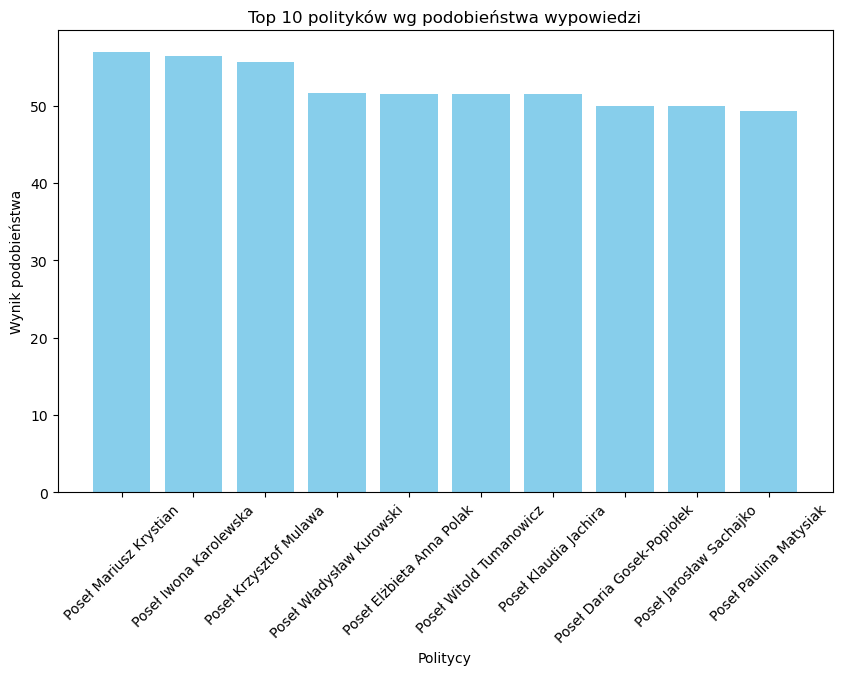

In [109]:
plt.figure(figsize=(10,6))
plt.bar(nazwiska, podobienstwa, color='skyblue')

plt.xlabel('Politycy')
plt.xticks(rotation=45)
plt.ylabel('Wynik podobieństwa')
plt.title('Top 10 polityków wg podobieństwa wypowiedzi')

C:\Users\Sikma\AppData\Local\Temp\ipykernel_9224\4031181088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=nazwiska, y=podobienstwa, data=df, palette='pastel')


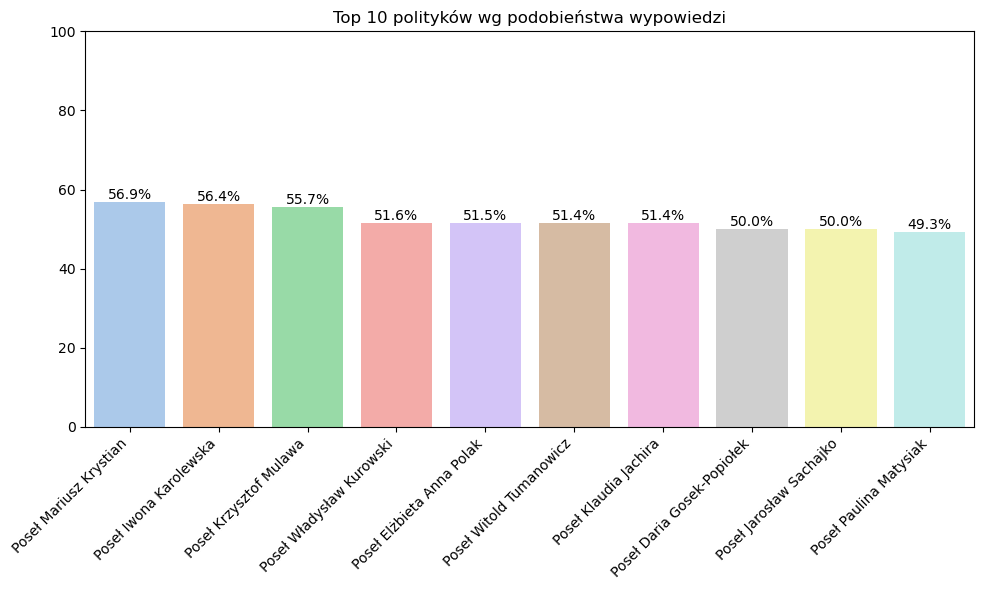

In [116]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=nazwiska, y=podobienstwa, data=df, palette='pastel')
ax.set_ylim(0,100)
# Dodajemy wartości nad słupkami
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.05,  # delikatnie nad słupkiem
            f'{height:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 polityków wg podobieństwa wypowiedzi')
plt.tight_layout()
plt.show()

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# Ładujemy PolBERT-a
model_name = "dkleczek/bert-base-polish-cased-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()  # jeśli nie trenujesz


I:\Anaconda\Lib\site-packages\transformers\utils\hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(60000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [2]:
def get_sentence_embedding(text, tokenizer, model):
    # Tokenizacja
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    
    token_embeddings = outputs.last_hidden_state  # (batch_size, seq_len, hidden_dim)
    attention_mask = inputs["attention_mask"]

    # Mean pooling
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    embedding = sum_embeddings / sum_mask
    return embedding


In [15]:
from torch.nn.functional import cosine_similarity

text1 = "Brak funduszy nie jest argumentem za zabiciem dziecka, aborcja nie powinna być dozwolona w takich przypadkach."
text2 = "Aborcja powinna być kwestią zdrowia publicznego, a nie ideologii. Dostęp do niej to podstawa nowoczesnego społeczeństwa, które szanuje autonomię jednostki."

emb1 = get_sentence_embedding(text1, tokenizer, model)
emb2 = get_sentence_embedding(text2, tokenizer, model)

similarity = cosine_similarity(emb1, emb2).item()
print(f"Podobieństwo: {similarity:.4f}")


Podobieństwo: 0.7135


In [9]:
emb1.shape

torch.Size([1, 768])